### Imports

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_py = "../ODE-RNN/Résultats/"
path_r = "../../data/synthetic_bph_1/Résultats regular time/"
path_simul = "../../data/synthetic_bph_1/Simulations regular time/"
CSV_Dtest = "../../data/synthetic_bph_1/Simulations regular time/01_test.csv"

### Gathering results

In [3]:
pred_py = pd.DataFrame(columns=['individus', 'temps'])
for file in os.listdir(path_py):
    if "Prédictions" in file:
        df = pd.read_csv(path_py + file)
        pred_py = pd.merge(pred_py, df, on=['individus', 'temps'], how='outer')
pred_r_train = pd.read_csv(path_simul + 'simulation1.csv', sep=";", decimal=",")
pred_r_train = pred_r_train.loc[:,['individus', 'temps', 'y_fixed', 'y_fixed_obs', 'y_mixed', 'y_mixed_obs', "pred_mixed", "pred_fixed", "pred_naif_mixed", "pred_naif_fixed"]]
data_test =  pd.read_csv(CSV_Dtest, sep=";", decimal=",")
pred_r_test = pd.read_csv(path_r + 'Predictions.csv', sep=",", decimal=".")
pred_r_test = pred_r_test[['individus','temps', 'pred_mixed_1', 'pred_fixed_1', 'pred_naif_fixed_1', 'pred_naif_mixed_1']] #don't forget to add , 'pred_naif_mixed _1'

#### Network results

In [4]:
res_py = pd.DataFrame(columns=['Random effect', 'Model', "MAE moyenne sur l'entrainement", "MSE moyenne sur l'entrainement", "MAE moyenne sur l'entrainement bruité", "MSE moyenne sur l'entrainement bruité", "MAE moyenne sur le test", "MSE moyenne sur le test", "MAE moyenne sur le test bruité", "MSE moyenne sur le test bruité"])
for file in os.listdir(path_py):
    if "json" in file:
        df = pd.read_json(path_py + file)
        res_py = pd.concat((res_py,df))
res_py = res_py.sort_values(by=["MAE moyenne sur l'entrainement"])
res_py_fixed = res_py[res_py["Random effect"]=='Fixed'][['Model',"MAE moyenne sur l'entrainement", "MSE moyenne sur l'entrainement", "MAE moyenne sur l'entrainement bruité", "MSE moyenne sur l'entrainement bruité", "MAE moyenne sur le test", "MSE moyenne sur le test", "MAE moyenne sur le test bruité", "MSE moyenne sur le test bruité"]]
res_py_mixed = res_py[res_py["Random effect"]=='Mixed'][['Model',"MAE moyenne sur l'entrainement", "MSE moyenne sur l'entrainement", "MAE moyenne sur l'entrainement bruité", "MSE moyenne sur l'entrainement bruité", "MAE moyenne sur le test", "MSE moyenne sur le test", "MAE moyenne sur le test bruité", "MSE moyenne sur le test bruité"]]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21812\4058926855.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_py = pd.concat((res_py,df))


#### Results of R models

In [5]:
res_r = pd.read_csv(path_r + "Performances_moyennes.csv")
res_oracle_mixed = res_r[[c for c in res_r.columns if ("naif" not in c) & ("mixed" in c) ]]
res_oracle_fixed = res_r[[c for c in res_r.columns if ("naif" not in c) & ("fixed" in c) ]]
res_naif_mixed = res_r[[c for c in res_r.columns if ("naif" in c) & ("mixed" in c)]]
res_naif_fixed = res_r[[c for c in res_r.columns if ("naif" in c) & ("fixed" in c)]]
res_oracle_mixed.rename(columns={'mae_train_mixed_truth':"MAE moyenne sur l'entrainement",
                                 'mse_train_mixed_truth':"MSE moyenne sur l'entrainement",
                                 'mae_test_mixed_truth':"MAE moyenne sur le test",
                                 'mse_test_mixed_truth':"MSE moyenne sur le test",
                                 "mae_train_mixed_obs": "MAE moyenne sur l'entrainement bruité",
                                 "mse_train_mixed_obs": "MSE moyenne sur l'entrainement bruité",
                                 "mae_test_mixed_obs": "MAE moyenne sur le test bruité",
                                 "mse_test_mixed_obs": "MSE moyenne sur le test bruité"
                                 }, inplace=True)
res_oracle_fixed.rename(columns={'mae_train_fixed_truth':"MAE moyenne sur l'entrainement",
                                 'mse_train_fixed_truth':"MSE moyenne sur l'entrainement",
                                 'mae_test_fixed_truth':"MAE moyenne sur le test",
                                 'mse_test_fixed_truth':"MSE moyenne sur le test",
                                 "mae_train_fixed_obs": "MAE moyenne sur l'entrainement bruité",
                                 "mse_train_fixed_obs": "MSE moyenne sur l'entrainement bruité",
                                 "mae_test_fixed_obs": "MAE moyenne sur le test bruité",
                                 "mse_test_fixed_obs": "MSE moyenne sur le test bruité"
                                 }, inplace=True)
res_naif_mixed.rename(columns={'mae_train_naif_mixed_truth':"MAE moyenne sur l'entrainement",
                                 'mse_train_naif_mixed_truth':"MSE moyenne sur l'entrainement",
                                 'mae_test_naif_mixed_truth':"MAE moyenne sur le test",
                                 'mse_test_naif_mixed_truth':"MSE moyenne sur le test",
                                 "mae_train_naif_mixed_obs": "MAE moyenne sur l'entrainement bruité",
                                 "mse_train_naif_mixed_obs": "MSE moyenne sur l'entrainement bruité",
                                 "mae_test_naif_mixed_obs": "MAE moyenne sur le test bruité",
                                 "mse_test_naif_mixed_obs": "MSE moyenne sur le test bruité"
                                 }, inplace=True)
res_naif_fixed.rename(columns={'mae_train_naif_fixed_truth':"MAE moyenne sur l'entrainement",
                                 'mse_train_naif_fixed_truth':"MSE moyenne sur l'entrainement",
                                 'mae_test_naif_fixed_truth':"MAE moyenne sur le test",
                                 'mse_test_naif_fixed_truth':"MSE moyenne sur le test",
                                 "mae_train_naif_fixed_obs": "MAE moyenne sur l'entrainement bruité",
                                 "mse_train_naif_fixed_obs": "MSE moyenne sur l'entrainement bruité",
                                 "mae_test_naif_fixed_obs": "MAE moyenne sur le test bruité",
                                 "mse_test_naif_fixed_obs": "MSE moyenne sur le test bruité"
                                 }, inplace=True)
res_oracle_mixed.loc[:,['Model']] = 'Oracle'
res_oracle_fixed.loc[:,['Model']] = 'Oracle'
res_naif_mixed.loc[:,['Model']] = 'Naif'
res_naif_fixed.loc[:,['Model']] = 'Naif'

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21812\611895753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_oracle_mixed.rename(columns={'mae_train_mixed_truth':"MAE moyenne sur l'entrainement",
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21812\611895753.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_oracle_fixed.rename(columns={'mae_train_fixed_truth':"MAE moyenne sur l'entrainement",
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_21812\611895753.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [6]:
res_fixed = pd.concat((res_py_fixed, res_oracle_fixed, res_naif_fixed))
res_mixed = pd.concat((res_py_mixed, res_oracle_mixed, res_naif_mixed))

## Performances in predicting with fixed effects

In [7]:
res_fixed[[c for c in res_fixed.columns if '_' not in c]]

,Model,MAE moyenne sur l'entrainement,MSE moyenne sur l'entrainement,MAE moyenne sur l'entrainement bruité,MSE moyenne sur l'entrainement bruité,MAE moyenne sur le test,MSE moyenne sur le test,MAE moyenne sur le test bruité,MSE moyenne sur le test bruité
0,ODE RNN,0.189537,0.066057,0.809369,1.021038,0.229185,0.135205,0.836202,1.108728
0,LSTM,0.306453,0.236836,0.869056,1.203338,0.278484,0.410434,0.885074,1.398544
0,RNN,0.308840,0.323885,0.877561,1.322043,0.274260,0.512204,0.885951,1.495224
0,Oracle,0.010957,0.000216,0.797762,0.999853,0.011199,0.000232,0.801426,1.001551
0,Naif,2.340459,12.021943,2.519020,13.020831,2.493645,13.790546,2.670302,14.811631


### graphs for training

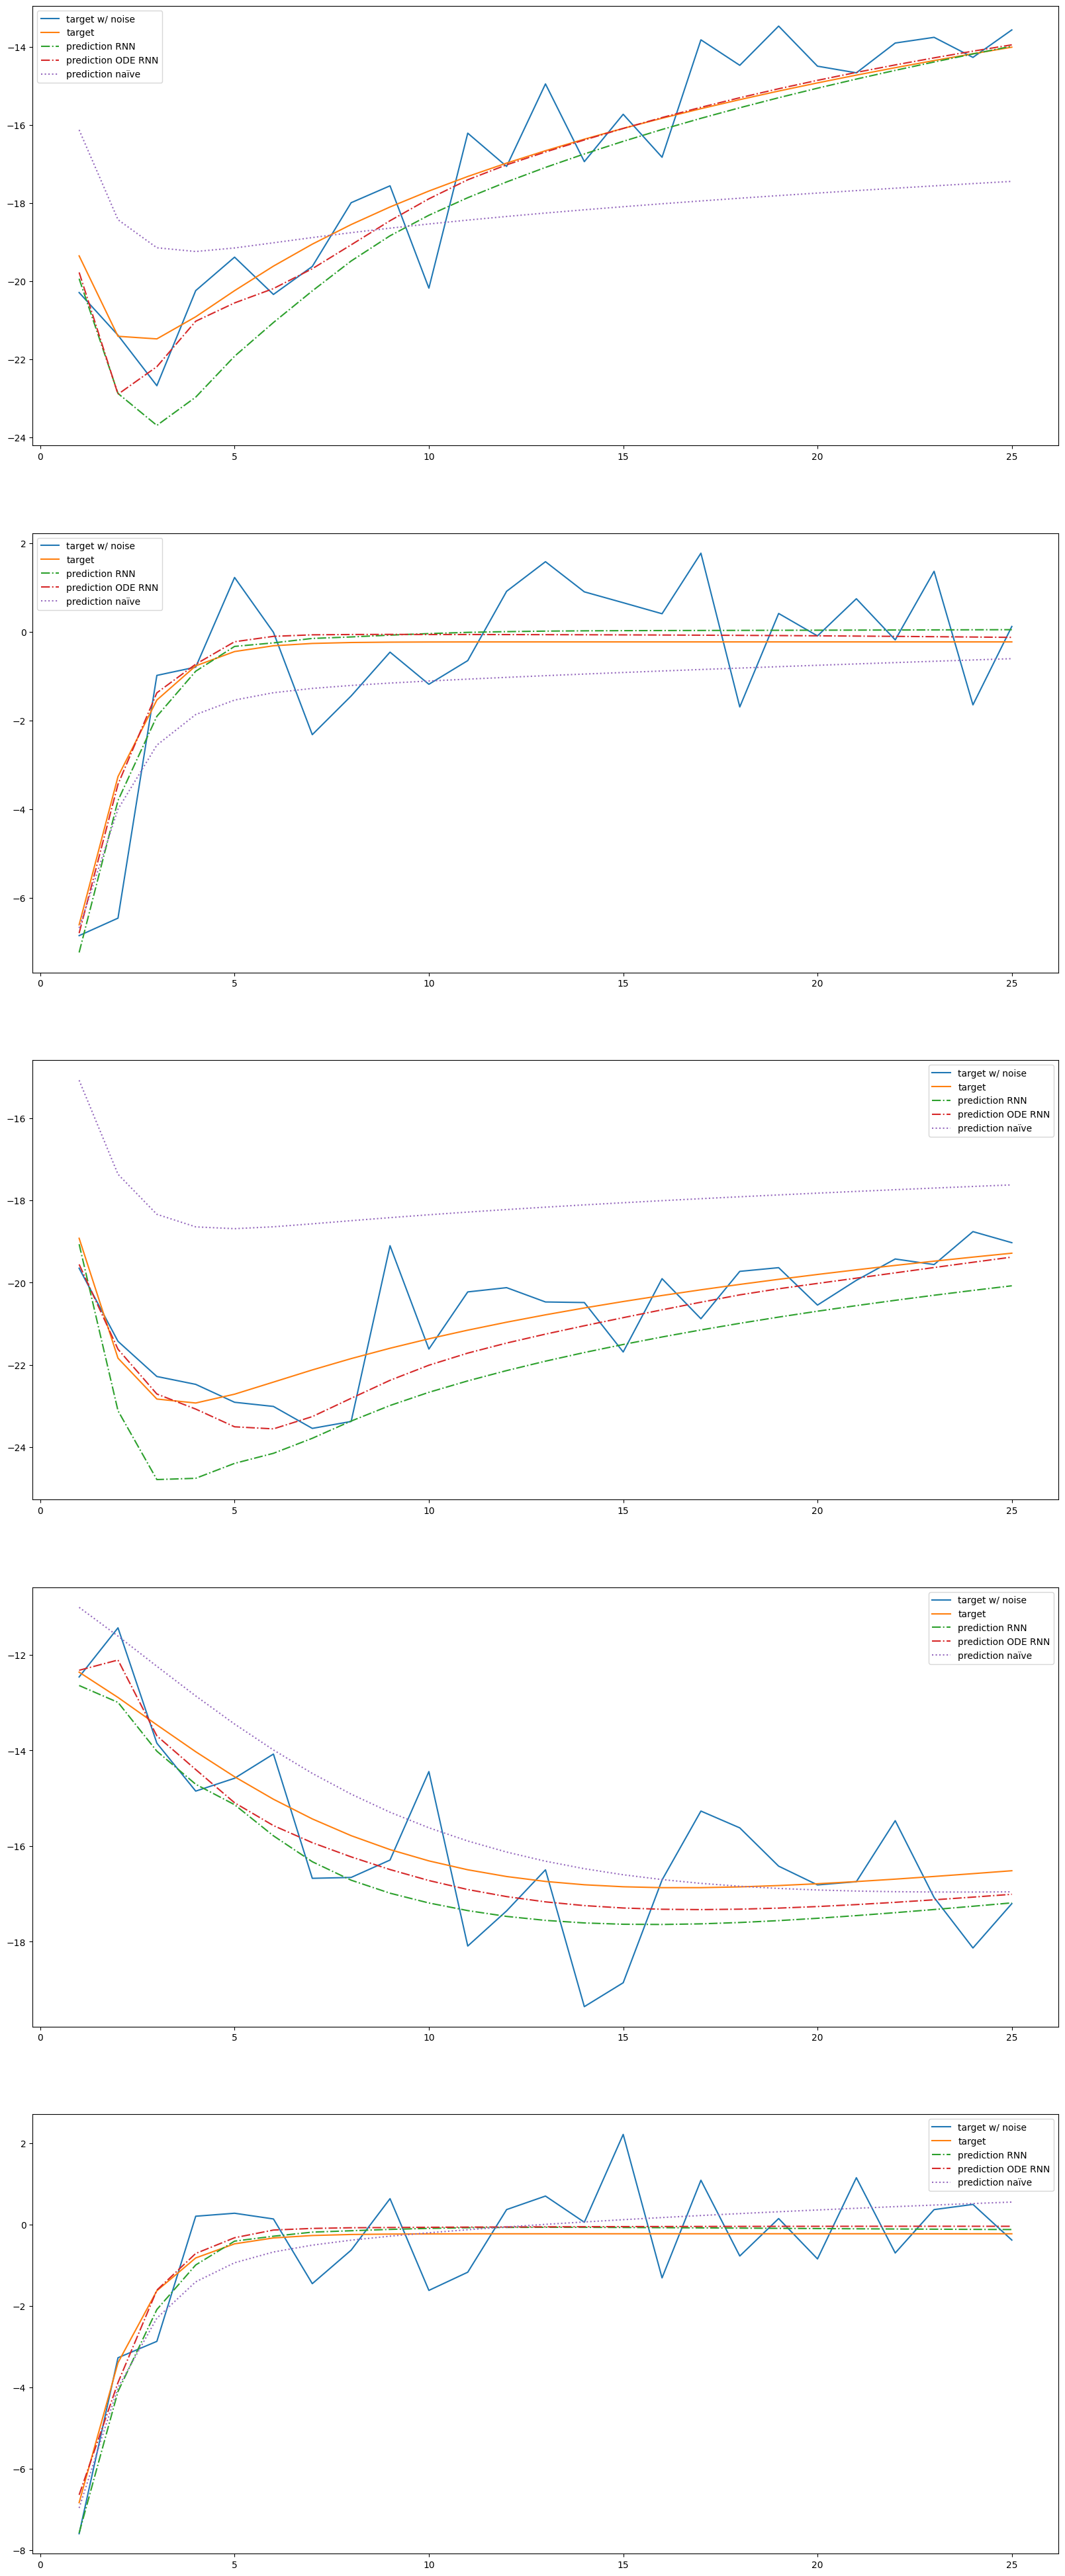

In [8]:
n = 5
ex = np.random.choice(pd.unique(pred_py['individus']), n)
fig, axs = plt.subplots(n)
fig.set_figwidth(20)
fig.set_figheight(50)
for k in range(n):
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['y_fixed_obs'], 
                label= 'target w/ noise')
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['y_fixed'], 
                label= 'target')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_pred_RNN_Fixed'], 
                label= 'prediction RNN', linestyle='dashdot')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_pred_ODE RNN_Fixed'], 
                label= 'prediction ODE RNN', linestyle='dashdot')
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['pred_naif_fixed'], 
                label= 'prediction naïve', linestyle='dotted')
    axs[k].legend()
plt.savefig("../../models/ODE-RNN/Résultats/Graphs/Train_fixed.png")

### graphs for test

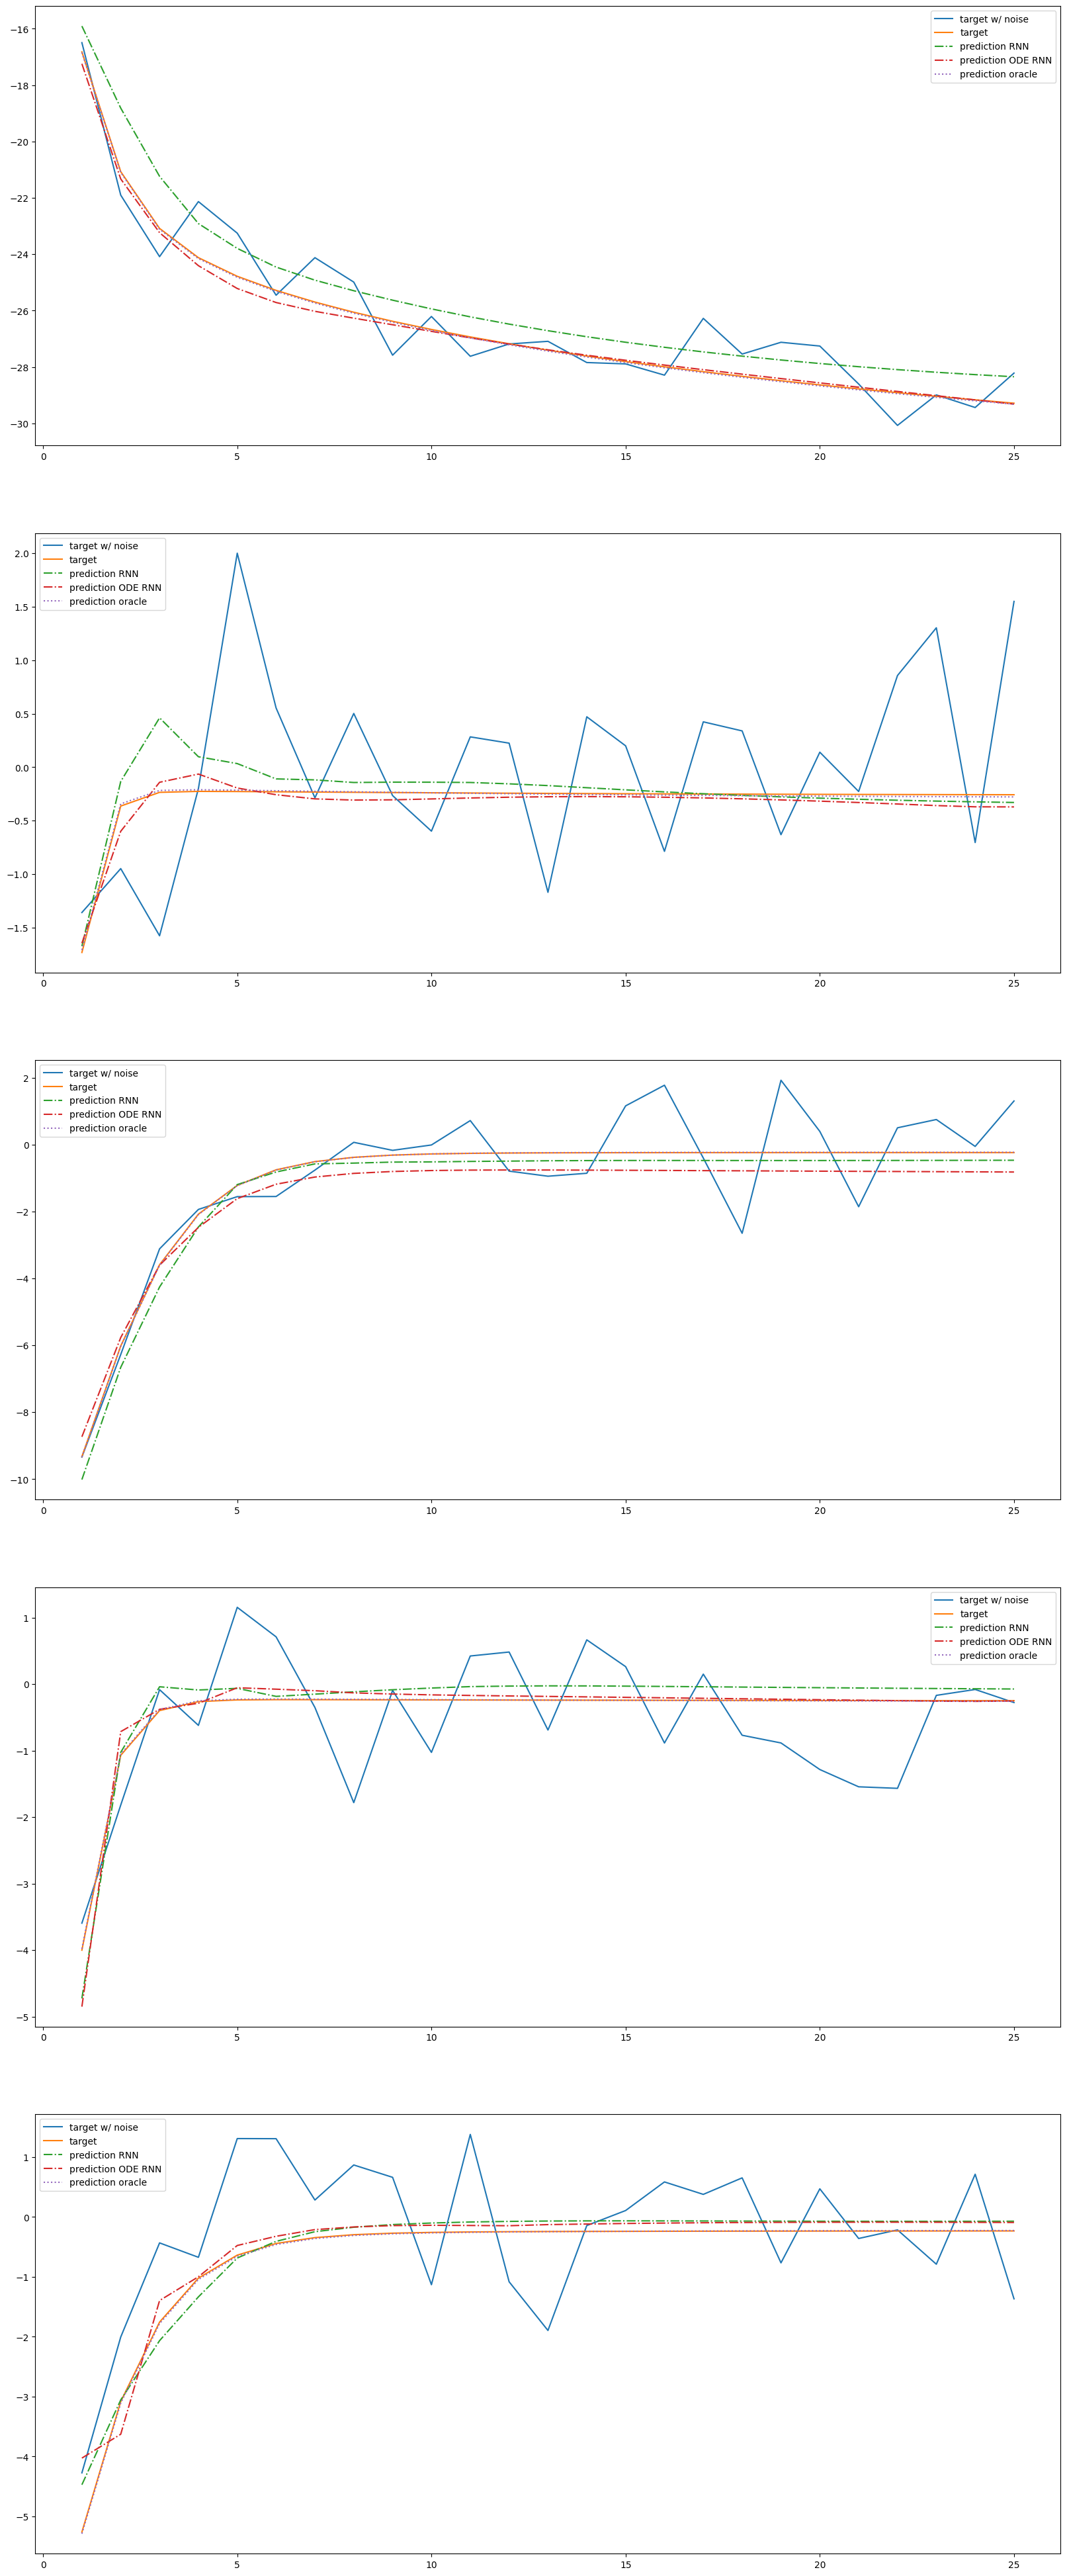

In [9]:
n = 5
ex = np.random.choice(pd.unique(pred_py['individus']), n)
fig, axs = plt.subplots(n)
fig.set_figwidth(20)
fig.set_figheight(50)
for k in range(n):
    axs[k].plot(data_test[(pred_r_test['temps']!=0) & (data_test['individus']== ex[k])]['temps'],
                data_test[(data_test['temps']!=0) & (data_test['individus']== ex[k])]['y_fixed_obs'], 
                label= 'target w/ noise')
    axs[k].plot(data_test[(data_test['temps']!=0) & (data_test['individus']== ex[k])]['temps'],
                data_test[(data_test['temps']!=0) & (data_test['individus']== ex[k])]['y_fixed'], 
                label= 'target')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_test_RNN_Fixed'], 
                label= 'prediction RNN', linestyle='dashdot')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_test_ODE RNN_Fixed'], 
                label= 'prediction ODE RNN', linestyle='dashdot')
    """axs[k].plot(pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['temps'],
                pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['pred_naif_fixed_1'], 
                label= 'prediction naïve', linestyle='dotted')"""
    axs[k].plot(pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['temps'],
                pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['pred_fixed_1'], 
                label= 'prediction oracle', linestyle='dotted')
    axs[k].legend()
plt.savefig("../../models/ODE-RNN/Résultats/Graphs/Test_fixed.png")

## Performance in predicting with mixed effects

In [13]:
res_mixed[[c for c in res_mixed.columns if '_' not in c]]

,Model,MAE moyenne sur l'entrainement,MSE moyenne sur l'entrainement,MAE moyenne sur l'entrainement bruité,MSE moyenne sur l'entrainement bruité,MAE moyenne sur le test,MSE moyenne sur le test,MAE moyenne sur le test bruité,MSE moyenne sur le test bruité
0,ODE RNN,1.857024,10.330460,1.458954,3.762972,9.286964,425.196719,9.486616,425.853587
0,RNN,3.797926,95.366120,3.780676,98.809793,9.979000,472.178010,10.133016,472.951473
0,LSTM,4.360697,194.849375,4.158494,224.474550,10.244348,521.161527,10.405457,521.062859
0,Oracle,0.200698,0.077528,0.763882,0.924996,0.200202,0.080565,0.758376,0.914418
0,Naif,0.278502,0.167011,0.769399,0.947212,0.282411,0.182332,0.765085,0.942284


### graphs for training

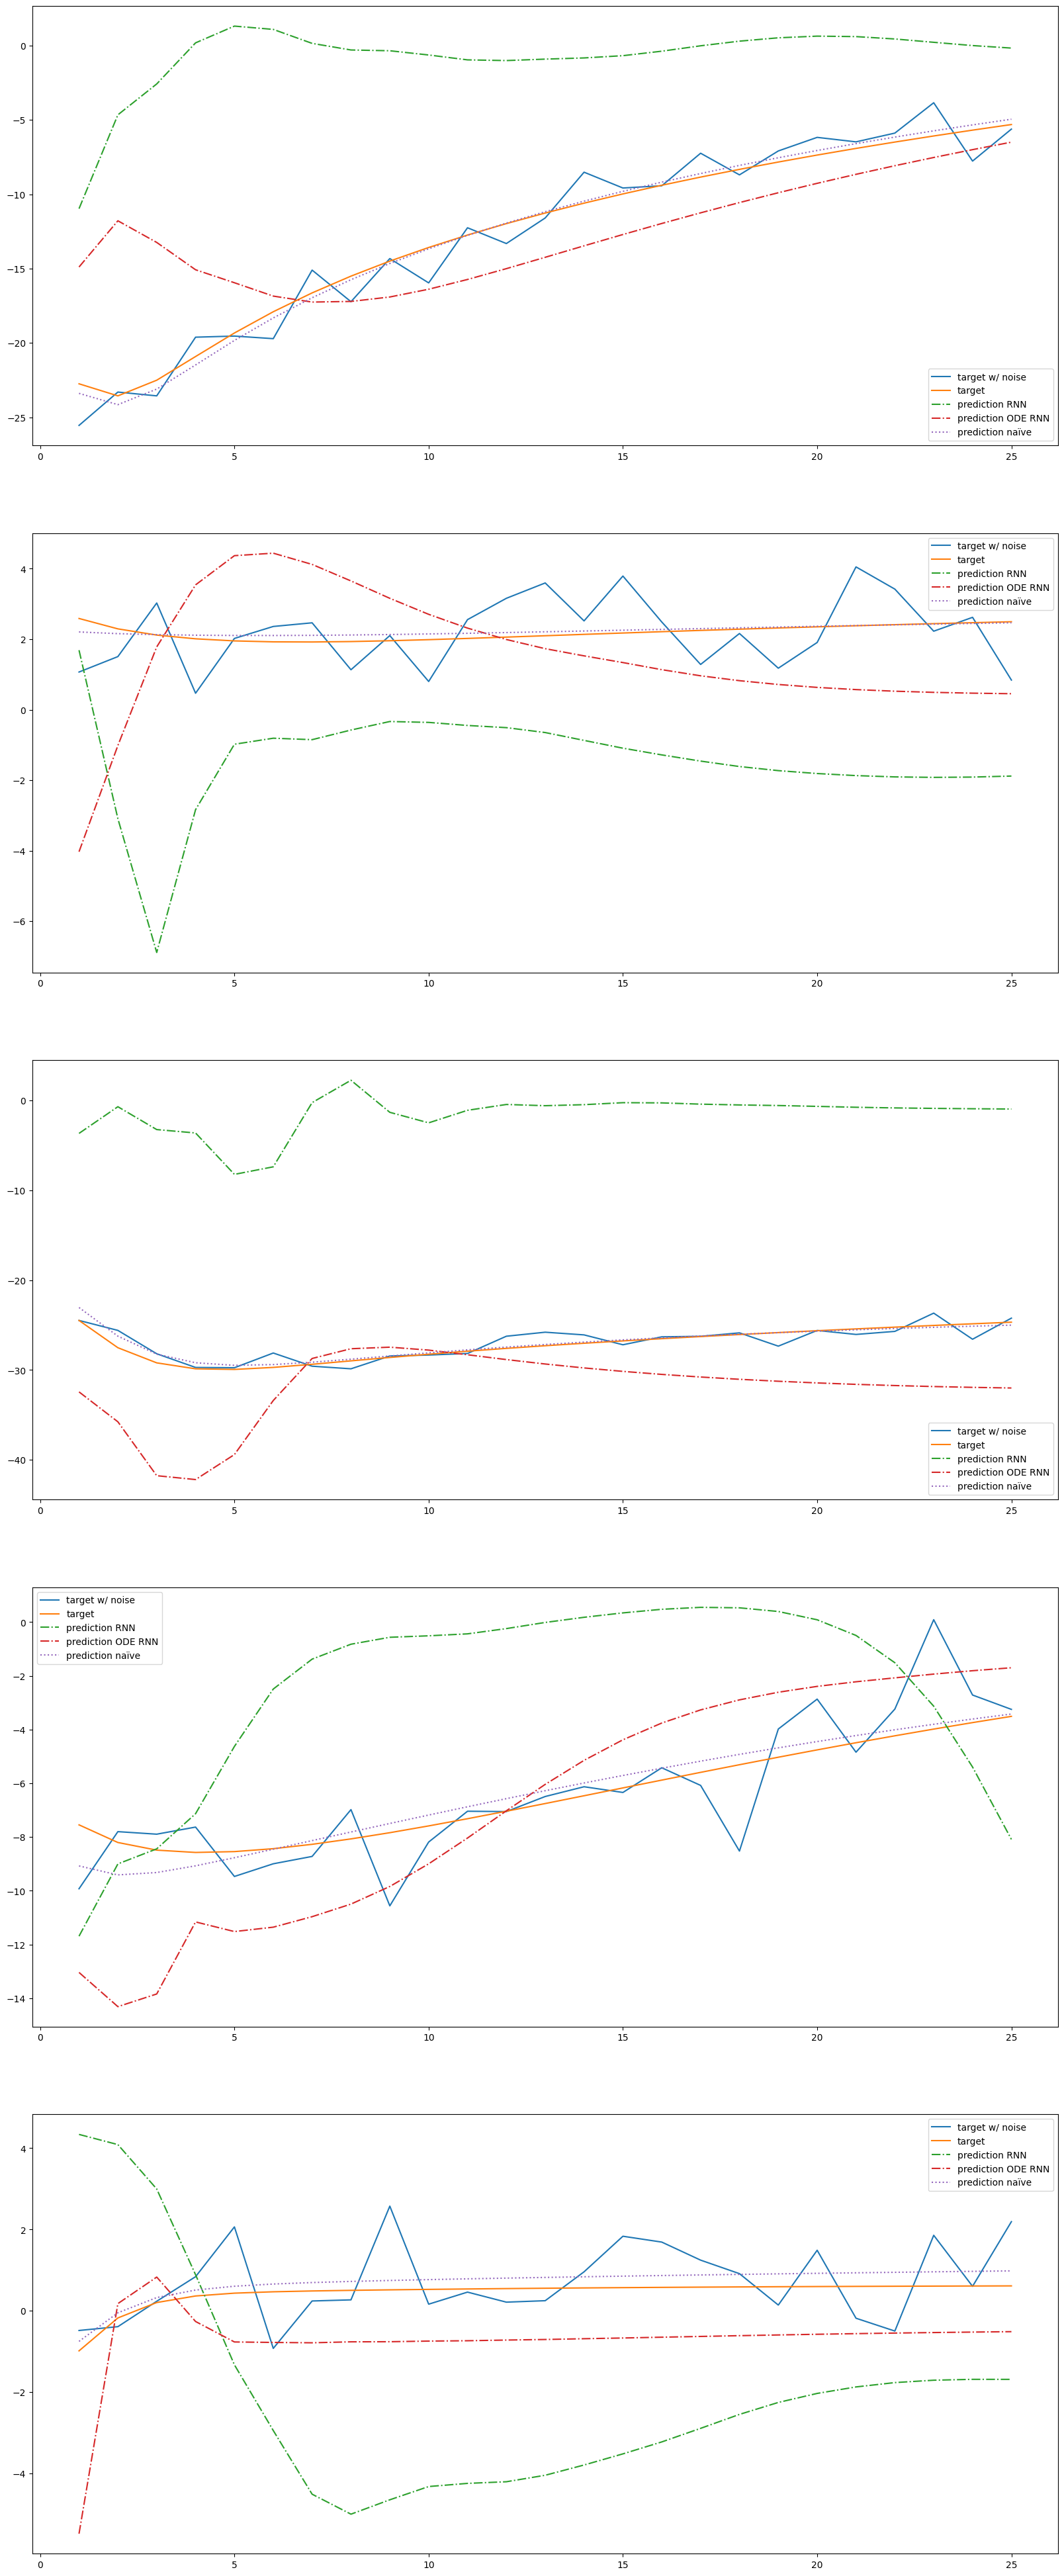

In [14]:
n = 5
ex = np.random.choice(pd.unique(pred_py['individus']), n)
fig, axs = plt.subplots(n)
fig.set_figwidth(20)
fig.set_figheight(50)
for k in range(n):
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['y_mixed_obs'], 
                label= 'target w/ noise')
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['y_mixed'], 
                label= 'target')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_pred_RNN_Mixed'], 
                label= 'prediction RNN', linestyle='dashdot')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_pred_ODE RNN_Mixed'], 
                label= 'prediction ODE RNN', linestyle='dashdot')
    axs[k].plot(pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['temps'],
                pred_r_train[(pred_r_train['temps']!=0) & (pred_r_train['individus']== ex[k])]['pred_naif_mixed'], 
                label= 'prediction naïve', linestyle='dotted')
    axs[k].legend()
plt.savefig("../../models/ODE-RNN/Résultats/Graphs/Train_mixed.png")

### graphs for testing

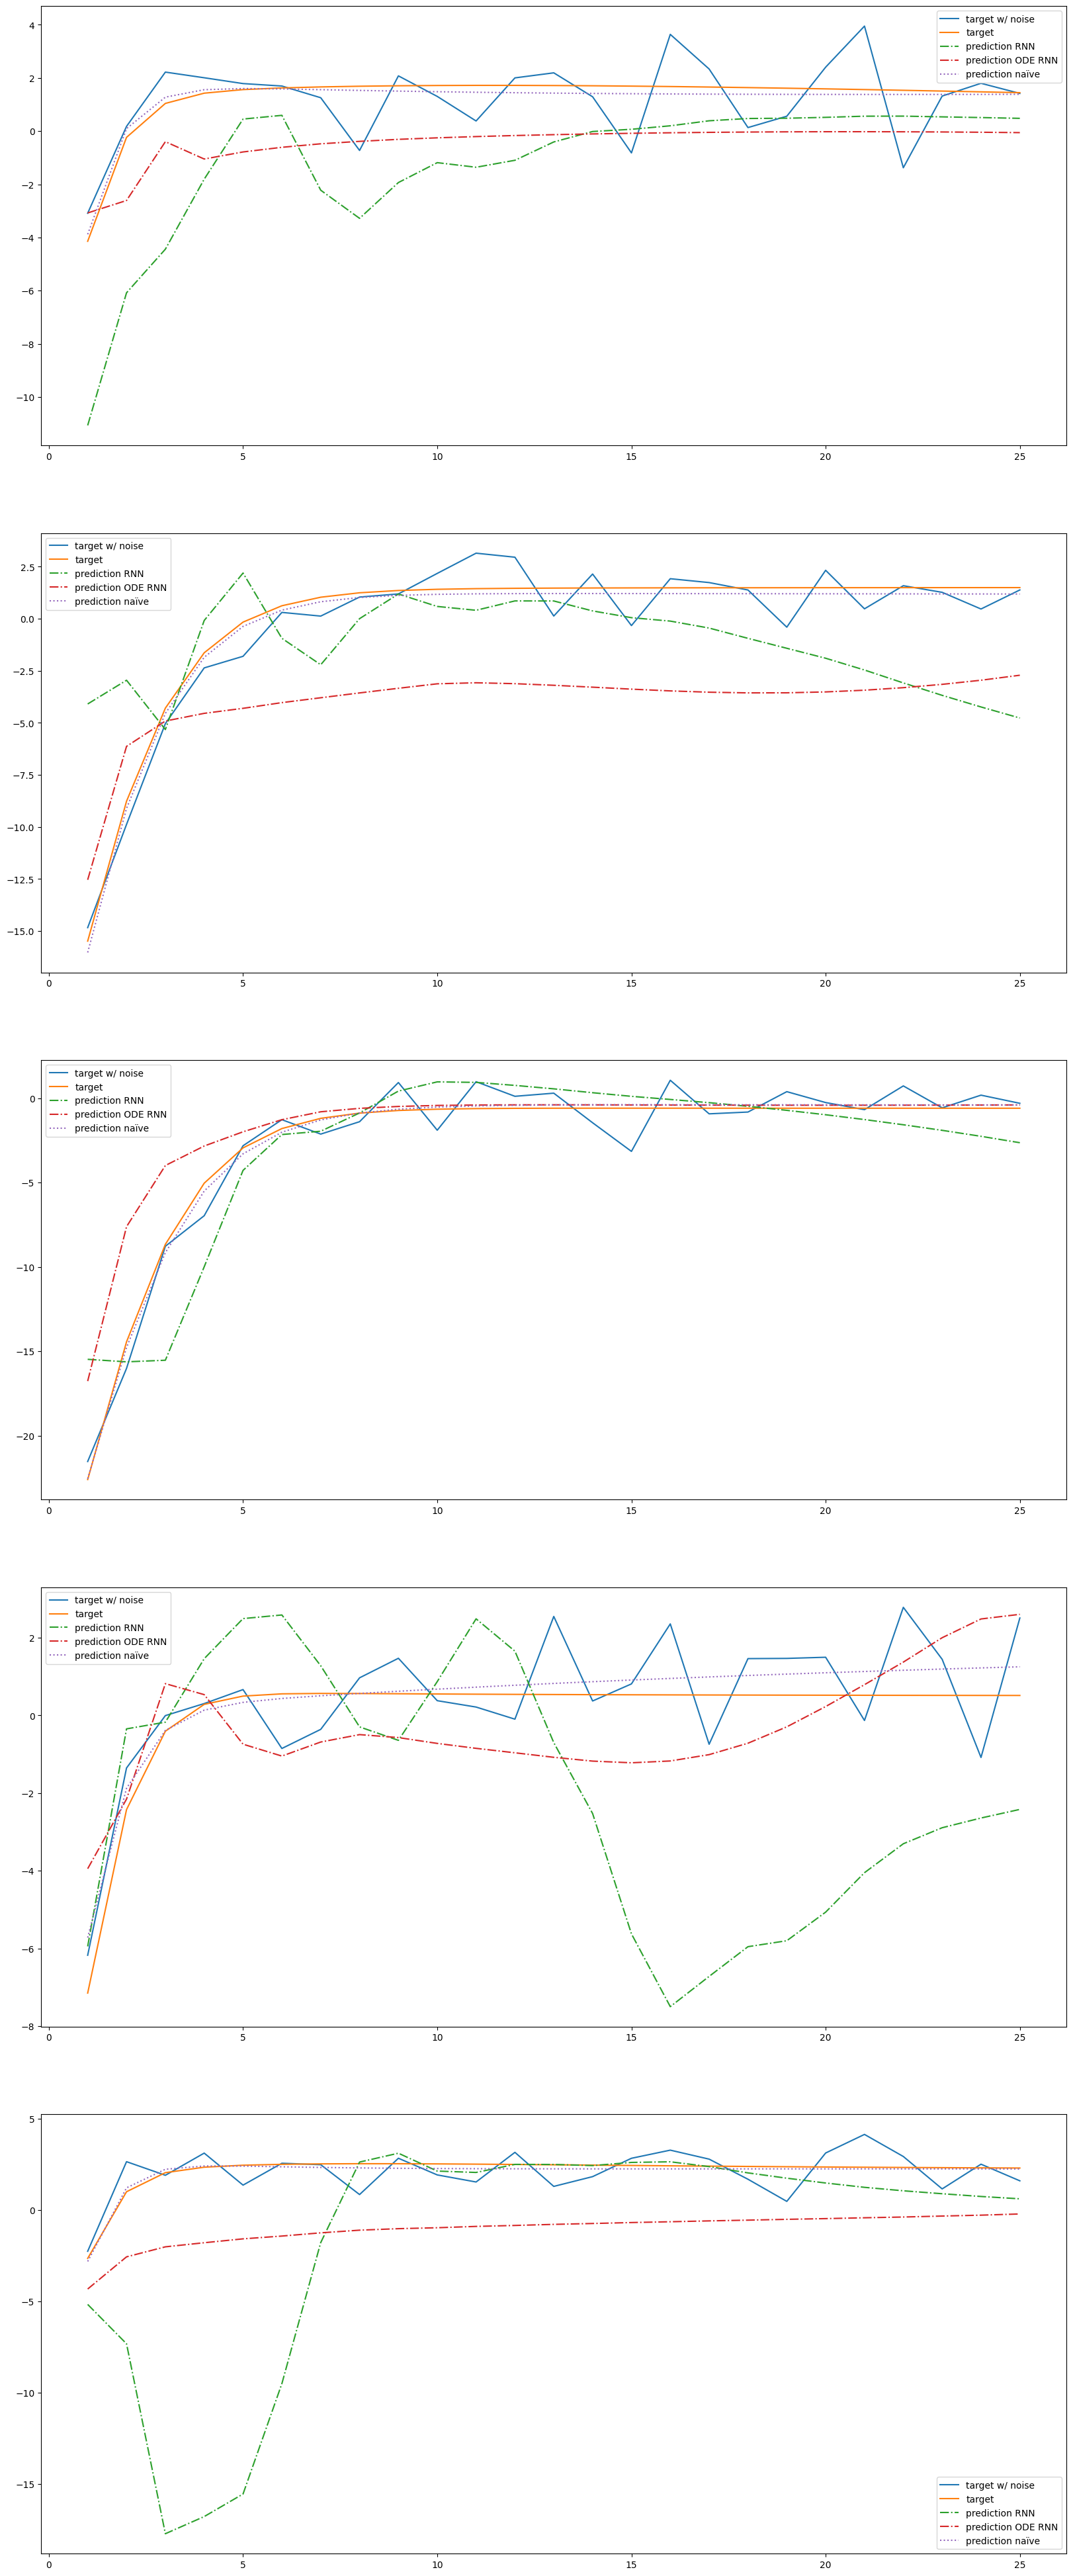

In [15]:
n = 5
ex = np.random.choice(pd.unique(pred_py['individus']), n)
fig, axs = plt.subplots(n)
fig.set_figwidth(20)
fig.set_figheight(50)
for k in range(n):
    axs[k].plot(data_test[(pred_r_train['temps']!=0) & (data_test['individus']== ex[k])]['temps'],
                data_test[(data_test['temps']!=0) & (data_test['individus']== ex[k])]['y_mixed_obs'], 
                label= 'target w/ noise')
    axs[k].plot(data_test[(data_test['temps']!=0) & (data_test['individus']== ex[k])]['temps'],
                data_test[(data_test['temps']!=0) & (data_test['individus']== ex[k])]['y_mixed'], 
                label= 'target')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_test_RNN_Mixed'], 
                label= 'prediction RNN', linestyle='dashdot')
    axs[k].plot(pred_py[(pred_py['temps']!=0) & (pred_py['individus']== ex[k])]['temps'],
                pred_py[(pred_py['temps']!=0) & (pred_py['individus']==ex[k])]['y_test_ODE RNN_Mixed'], 
                label= 'prediction ODE RNN', linestyle='dashdot')
    axs[k].plot(pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['temps'],
                pred_r_test[(pred_r_test['temps']!=0) & (pred_r_test['individus']== ex[k])]['pred_naif_mixed_1'], 
                label= 'prediction naïve', linestyle='dotted')
    axs[k].legend()
plt.savefig("../../models/ODE-RNN/Résultats/Graphs/Test_mixed.png")